In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import rasterio as rio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/najah/work/internships/meghna//LT05_L1TP_145044_20100428_20161016_01_T1')

## reading image



In [9]:
l5 = rio.open('./145044_masked_stacked_wgs84.tif')

NameError: name 'random_points' is not defined

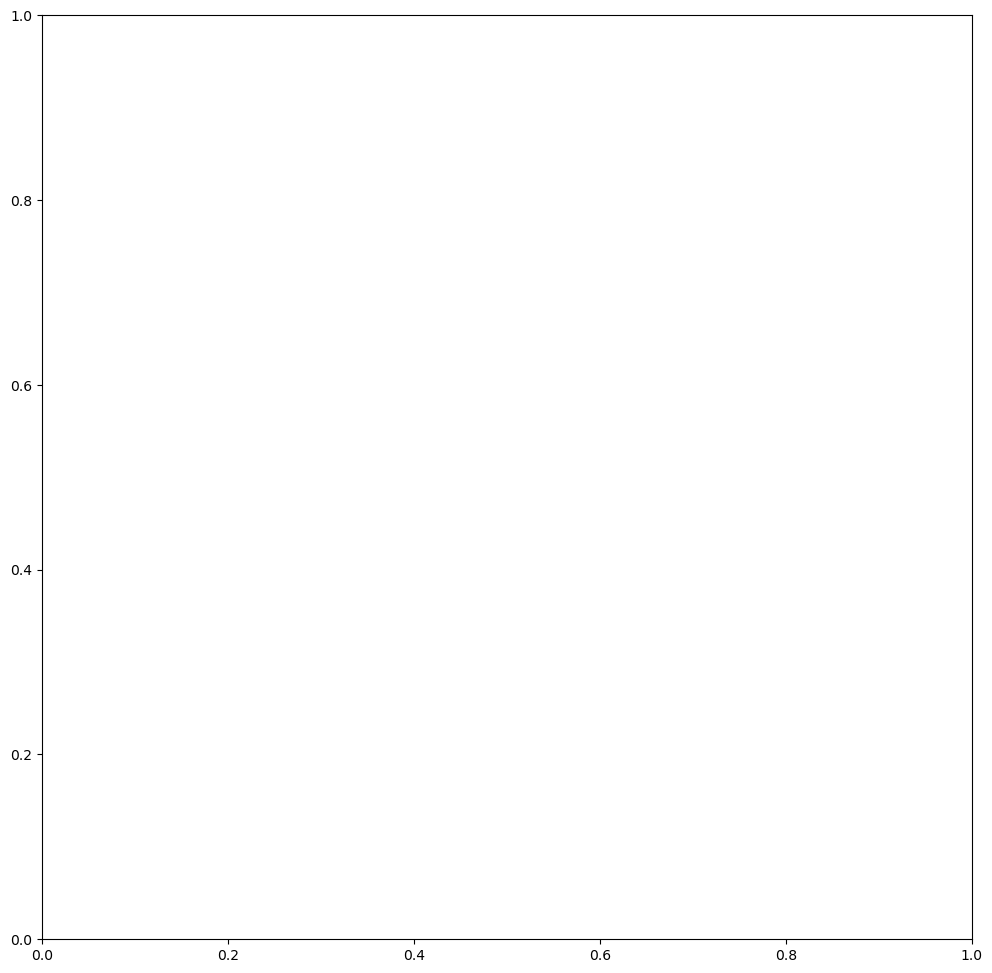

In [10]:
fig, ax = plt.subplots(figsize = (12,12))
random_points.plot(ax = ax, color = 'orange')
show((l5,4), ax = ax)

### class creation

In [3]:
random_points = gpd.read_file("./145044_20100428_roi/145044_20100428_random_points_2/random_points_merged.shp")

In [5]:
random_points['class'] = random_points['class'].astype('int')

In [6]:
 random_points['class'].value_counts()

11    222
5     155
1      73
13     63
4      59
15     45
2      35
16     21
17     15
8      12
Name: class, dtype: int64

ag_fire class

In [10]:
random_points['ag_fire'] = np.where(random_points['class']==5,1,0)

### splitting the dataset

In [17]:
points500 = random_points.sample(n = 500, random_state= 123)

In [8]:
points500['class'].value_counts()

11    149
5     111
1      56
13     50
4      43
15     35
2      22
16     15
17     10
8       9
Name: class, dtype: int64

creating another class with 12 on others.
what about 13?

In [13]:
points500['class1'] = points500['class']
points500.class1.head()


57     11
478    10
597     4
689    10
647     5
Name: class1, dtype: int64

In [14]:
## reclassfiying 12 as others
points500['class1'] = np.where(points500['class1']==12,11,points500['class1'])
points500.class1.value_counts()

11    180
10    146
5      76
1      33
13     23
2      19
4      16
8       7
Name: class1, dtype: int64

In [16]:
type(points500)

geopandas.geodataframe.GeoDataFrame

In [9]:
points200 =random_points.drop(points500.index)

In [10]:
points200['class'].value_counts()

11    73
5     44
1     17
4     16
13    13
2     13
15    10
16     6
17     5
8      3
Name: class, dtype: int64

In [62]:
##points500[['ag_fire', 'class']]= points500[['ag_fire', 'class']].astype(float)

In [65]:
##points200[['ag_fire', 'class']]= points200[['ag_fire', 'class']].astype(float)

In [21]:
type(points200)

geopandas.geodataframe.GeoDataFrame

In [23]:
## reclassfiying 12 as others
points200['class1'] = points200['class']
points200['class1'] = np.where(points200['class']==12,11,points200['class'])
points200.head()

,id,long,lat,class,geometry,ag_fire,class1
2,2.0,78.749,22.635,1,POINT (78.74949 22.63525),0,1
3,3.0,77.164,23.340,5,POINT (77.16359 23.34006),1,5
8,8.0,78.181,22.470,11,POINT (78.18053 22.47018),0,11
10,10.0,77.646,23.470,11,POINT (77.64561 23.46997),0,11
14,14.0,78.844,23.173,11,POINT (78.84402 23.17313),0,11


In [14]:
points200.to_file("./145044_20100428_roi/145044_20100428_200points.random_points2")

In [19]:
points500.to_file("./145044_20100428_roi/145044_20100428_500points.random_points2")